In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
path = '/home/andre/Загрузки/D-ITG-2.8.1-r1023-src/D-ITG-2.8.1-r1023/bin/'
time = []
packet_loss_lists = [[] for x in range(1,5+1)]

# "Time", "Bitrate", "Delay", "Jitter", "Packet loss"
# with open(path + "combined_stats.dat", "r") as f:
#     for line in f.readlines():
#         split_line = line.split()
#         time.append(split_line[0])
#         packet_loss_5.append(split_line[4])

with open("/home/andre/PycharmProjects/onos_short_path/" + 't.txt', "r") as f:
    for line in f.readlines():
        split_line = line.split()
        time.append(split_line[0])

for i in range (1, 5+1):
    with open("/home/andre/PycharmProjects/onos_short_path/" + f'pl{i}.txt', "r") as f:
        for line in f.readlines():
            split_line = line.split()
            packet_loss_lists[i-1].append(split_line[0].replace(",", "."))

for i in range (1, 5+1):
    print(len(packet_loss_lists[i-1]))
    
df = pd.DataFrame({
    "time":time,
#     "packetLoss1": packet_loss_lists[0],
#     "packetLoss2": packet_loss_lists[1],
    "packetLoss3": packet_loss_lists[2],
    "packetLoss4": packet_loss_lists[3],
    "packetLoss5": packet_loss_lists[4],
})
df.time = df.time.apply(float)
# df.packetLoss1 = df.packetLoss1.apply(float)
# df.packetLoss2 = df.packetLoss2.apply(float)
df.packetLoss3 = df.packetLoss3.apply(float)
df.packetLoss4 = df.packetLoss4.apply(float)
df.packetLoss5 = df.packetLoss5.apply(float)
df

259
289
1005
1005
1005


,time,packetLoss3,packetLoss4,packetLoss5
0,0.00,12.0,4.0,13.0
1,0.01,11.0,17.0,16.0
2,0.02,12.0,17.0,12.0
3,0.03,4.0,5.0,16.0
4,0.04,0.0,8.0,15.0
...,...,...,...,...
1000,10.00,0.0,0.0,0.0
1001,10.01,0.0,0.0,0.0
1002,10.02,0.0,0.0,0.0
1003,10.03,0.0,0.0,0.0


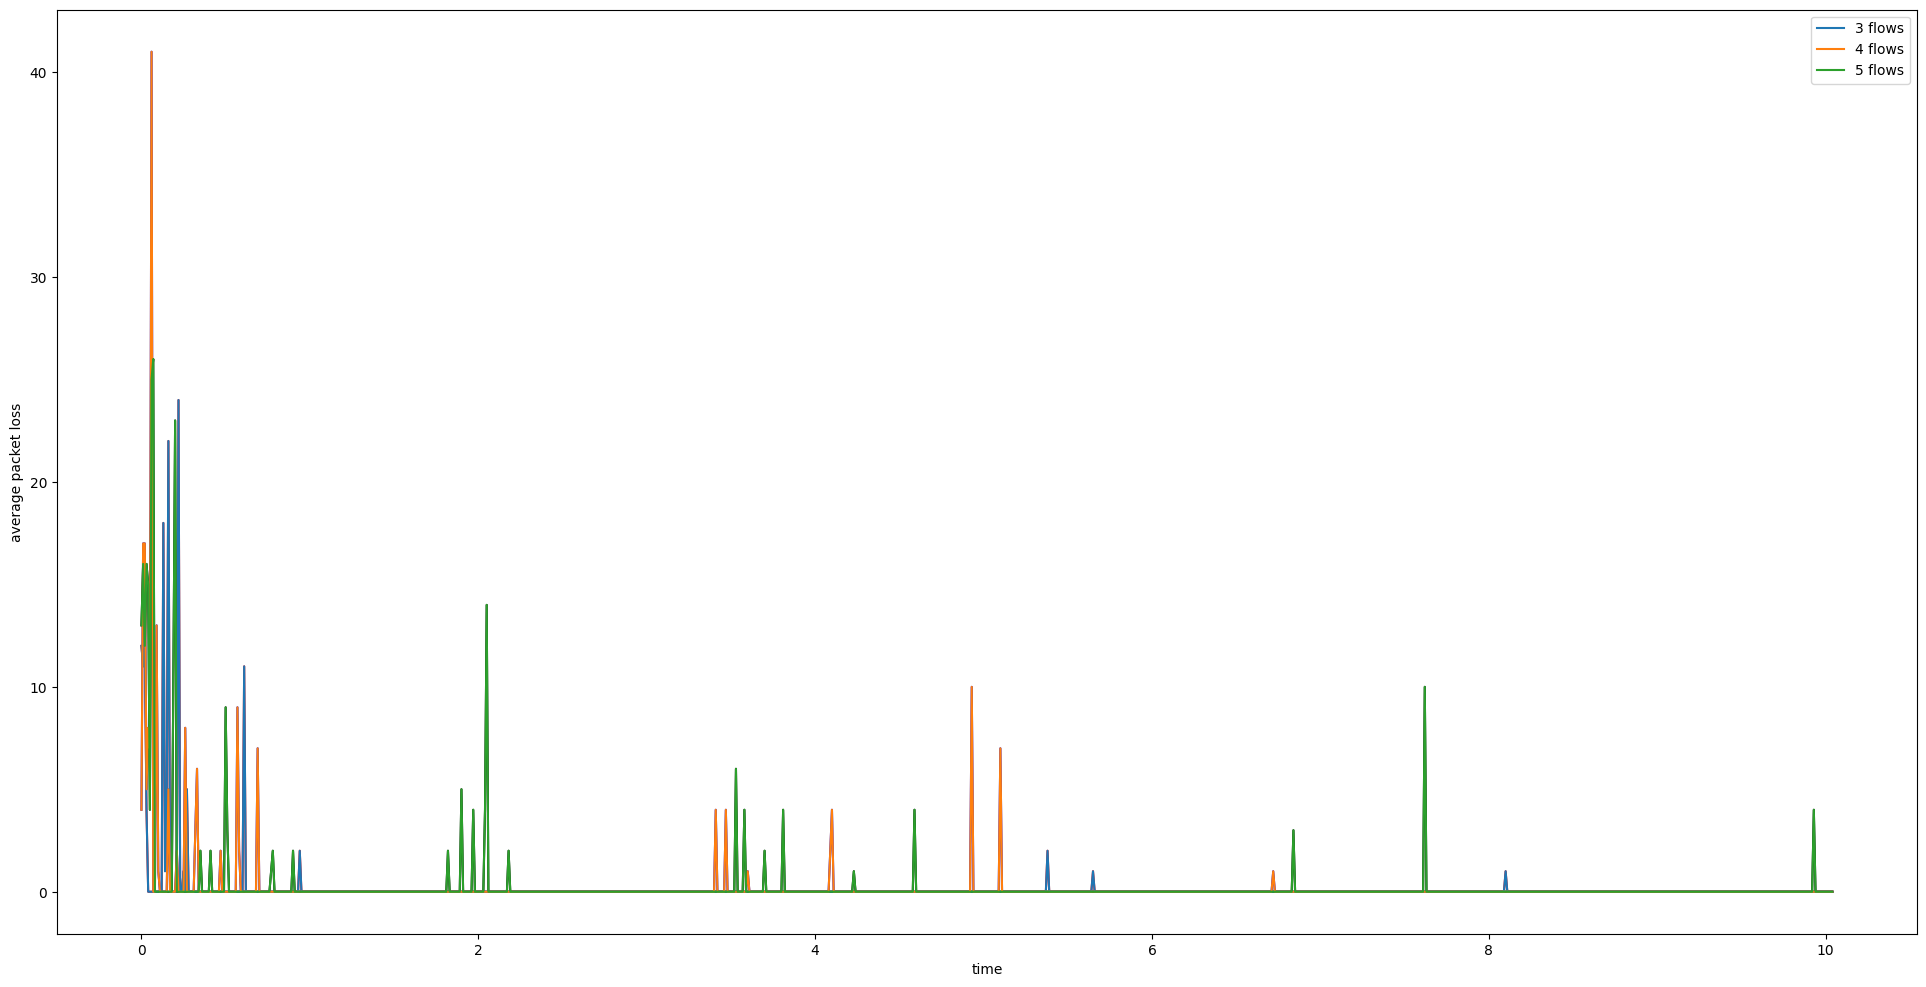

In [82]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
x = df['time']
y3 = df['packetLoss3']
y4 = df['packetLoss4']
y5 = df['packetLoss5']
ax.plot(x, y3, color='red')
ax.plot(x, y4, color='blue')
ax.plot(x, y5, color='black')

ax.set_xlabel('time')
ax.set_ylabel('average packet loss')

ax.plot(x, y3, label = '3 flows')
ax.plot(x, y4, label = '4 flows')
ax.plot(x, y5, label = '5 flows')
ax.legend()

plt.show()